**< 따릉이 사용자 예측 문제를 좀 다르게 풀어보자! >**

*   K겹 교차 검증
*   랜덤 포레스트 회귀

(어차피 모델 돌리는 데에는 다양한 방법이 있고, 이것도 그 중 하나일 뿐..)



(그래도 해설 영상으로 제공해 준 랜덤포레스트 코드 보다 성능이 좋아졌다!)


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from pandas import DataFrame

In [2]:
#데이터 불러오기
df_train = pd.read_csv('2020.AI.bike-train.csv')
df_test = pd.read_csv('2020.AI.bike-test.csv')
df_submission = pd.read_csv('2020.AI.bike-submission.csv')

In [3]:
#seed값 설정
seed = 0
np.random.seed(3)
tf.random.set_seed(3)

In [4]:
#학습데이터 슬라이싱
x_train = df_train.iloc[:,1:-1] 
y_train = df_train.iloc[:,-1]   

#테스트데이터 슬라이싱
x_test = df_test.iloc[:,1:] 

*   kFold 함수 : 몇 개로 분할 할 지, 데이터 분할 전 섞을지

*   RandomForestRegressor 함수 : 회귀분석의 종류 중 하나 (기계학습 : 다수의 결정 트리들을 앙상블 기법으로 학습하는 모델)

> *   n_estimators : 포레스트에서 트리의 수
*   random_state : 트리를 만들 때 사용하는 샘플의 무작위성

*   cross_val_score 함수 : k겹 교차 검증을 반복문 없이 쉽게 사용할 수 있게 해주는 함수, 내부적으로는 StratifiedKFold 사용

>*   사용할 모델, 학습 데이터, 타겟 데이터, cv는 분할 설정 값

*   score.mean() : k겹 교차 검증 결과의 평균


In [5]:
kfold = KFold(n_splits=5, shuffle=True)

model = RandomForestRegressor(n_estimators=100, random_state=100)
model.fit(x_train, y_train)

score = cross_val_score(model, x_train, y_train, cv=kfold)

#k겹 교차 검증으로 예측해보는 이 모델의 정확도
print(score)
print(score.mean())

[0.76907341 0.74885875 0.79751041 0.80081331 0.75212065]
0.7736753090871931


In [6]:
#예측값('count')
y_test = model.predict(x_test).flatten()
y_test

array([ 14.9 , 236.32, 134.77,  42.49, 120.9 , 292.95,  29.43, 131.38,
       121.35, 118.59,   8.62, 146.67,   9.43,  22.54, 242.82, 113.72,
       100.11, 250.09, 118.3 , 150.19, 253.06, 193.75,  32.8 ,  93.86,
       225.21,  60.82, 189.21, 146.88, 200.03, 132.07,  13.13,  30.57,
        90.07, 185.99,  99.47, 276.82, 106.91, 136.03,  42.63, 162.21,
        88.11, 152.95, 141.97, 241.21, 153.48, 215.57, 109.81,  14.56,
        89.76,  35.82, 134.73, 235.72,  80.85, 134.96, 221.42,  18.2 ,
       119.74,  87.85, 191.95, 255.11, 143.58, 158.04, 102.08,  97.34,
        14.17, 144.41, 267.72, 132.13,  21.62,  11.44, 129.39, 234.36,
        87.2 , 190.73,  90.  , 106.32, 195.6 ,  15.44, 229.63, 221.56,
       129.05, 108.49, 115.89, 161.1 , 227.43, 230.85, 274.58, 108.57,
        36.34,  82.12, 103.09,  71.52, 210.72,  18.65,  44.69,  76.96,
       188.39, 119.65,  26.91, 254.61, 252.27,  82.59,  29.3 ,  19.72,
       235.76, 143.83,  17.04,  95.33, 216.45, 239.03,  76.9 , 172.28,
      

In [8]:
#제출 파일에 예측값 넣기
for i in range(len(df_submission)):
  df_submission['id'][i] = int(i)
  df_submission['count'][i] = y_test[i]
  df_submission['id']= df_submission['id'].astype(int)
  df_submission['count']= df_submission['count'].astype(int)
  
df_submission

,id,count
0,0,14
1,1,236
2,2,134
3,3,42
4,4,120
...,...,...
322,322,18
323,323,16
324,324,19
325,325,207


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'test')]

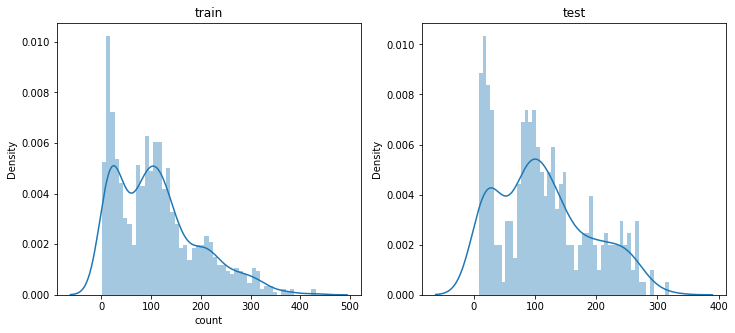

In [9]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)

sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(y_test,ax=ax2,bins=50)
ax2.set(title="test")

In [10]:
#예측값 담은 파일 저장
df_submission.to_csv("result_bike.csv", index=False,header=True)

(39점 밑으로 내려보려고 노력했으나...)

그래도 새로운 모델 사용, 해설로 제공된 같은 모델보다 좀 더 좋은 점수를 받은 것